<a href="https://colab.research.google.com/github/PierfrancescoElia/AICyberLabs/blob/main/Lab01/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Introduction to Deep Learning

| Member | ID |
| -- | -- |
| Alessandro Meneghini| s332228 |
| Pierfrancesco Elia | s331497 |
| Ankesh Porwal | s328746 |


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset
import time


## Task 1: Data Preprocessing

In this step, we analyze the dataset to ensure effective preprocessing and start with a clean, functional dataset. We identify NaN and Inf values, which we decide to remove. Additionally, we find certain features that are mostly zero, except for a few cases, making them irrelevant for our analysis.

Steps Performed:
- Removed duplicate entries.
- Identified and removed NaN values.
- Identified and removed Inf values.
- Data Visualization
- Evaluated features with minimal variation and removed those deemed irrelevant.
- Dataset splitting
- Standardization


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# import the dataset
dataset_url = 'https://raw.githubusercontent.com/PierfrancescoElia/AICyberLabs/refs/heads/main/Lab01/dataset_lab_1.csv'
df = pd.read_csv(dataset_url)

df

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


20 columns of DoS Hulk are empty, we will drop them


In [4]:
# Remove duplicates
df = df.drop_duplicates()

#check NaN value to decide if delete them or maybe popolate with zero
display(df[df.isna().any(axis=1)])
# Remove rows with nan value
df = df.dropna()

# check inf values
display(df[df.isin([np.inf,-np.inf]).any(axis=1)])
# Remove rows with inf
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
2130,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,52606,Benign
16361,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,19152,Benign
20043,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,80,DoS Hulk


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
6683,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64231,Benign
9265,0,0.0,1,0.0,0,inf,0,1,7.0,0.0,9.333333,14,2,inf,2,47542,Benign
10138,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,17774,Benign
11793,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,21,Benign
14833,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64299,Benign
15627,0,0.0,0,6.0,6,inf,1,0,6.0,0.0,6.000000,6,1,inf,1,443,Benign
29324,0,0.0,0,6.0,6,inf,1,0,0.0,0.0,2.000000,0,1,inf,1,1026,PortScan


### Data Visualization

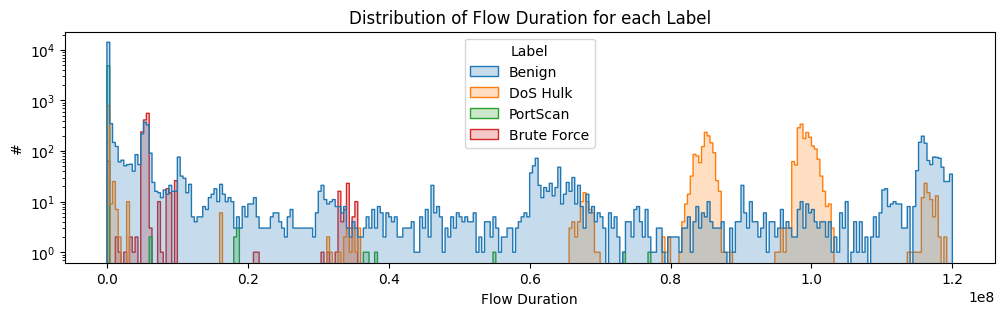

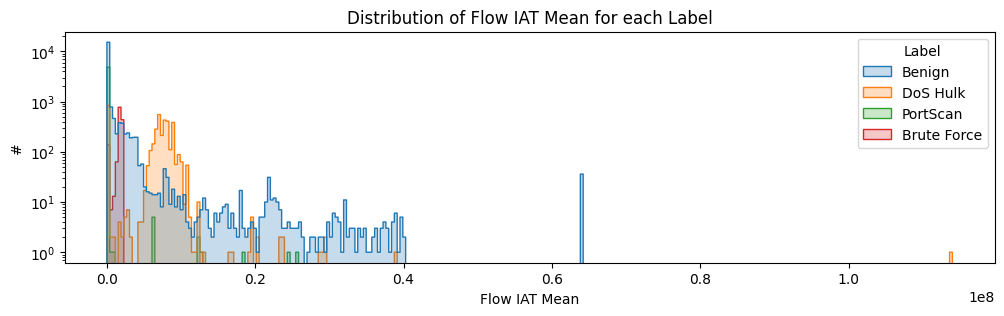

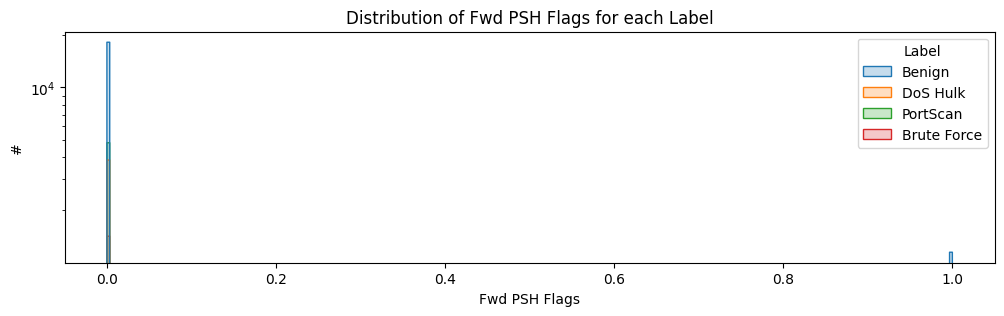

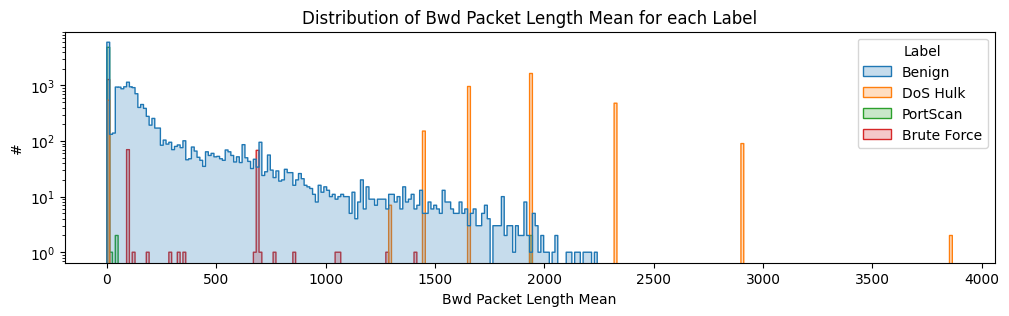

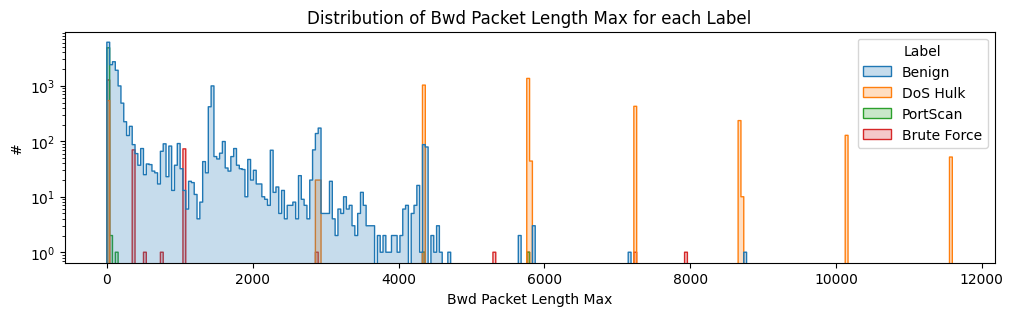

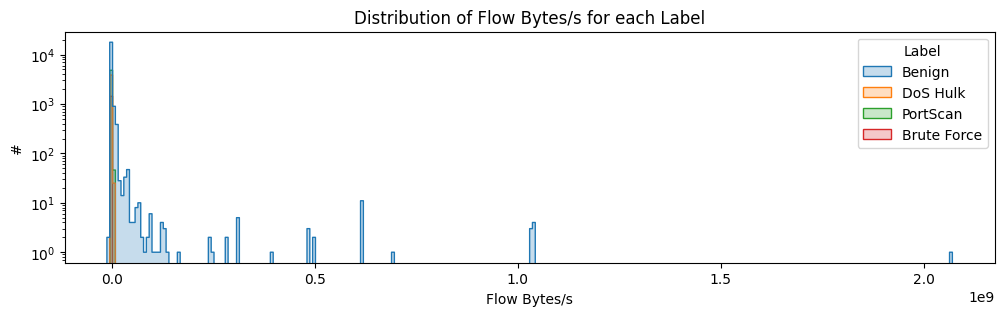

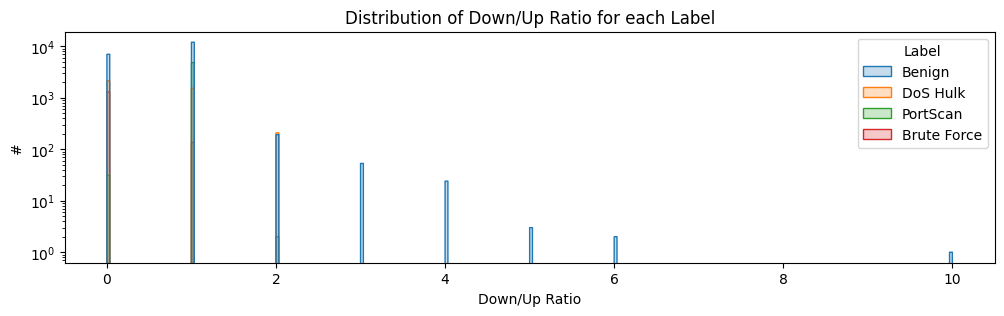

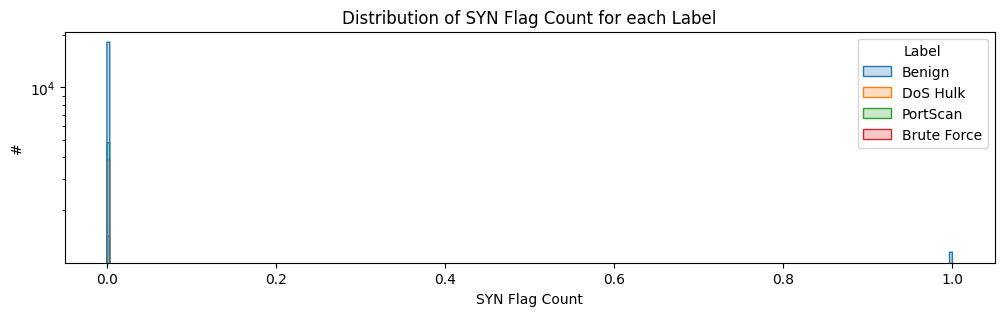

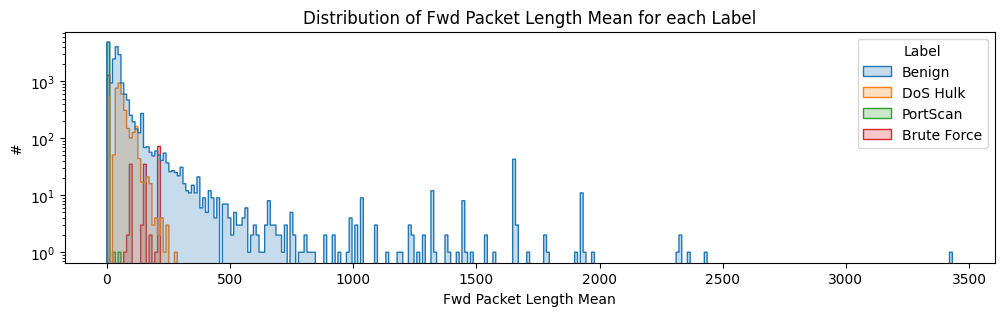

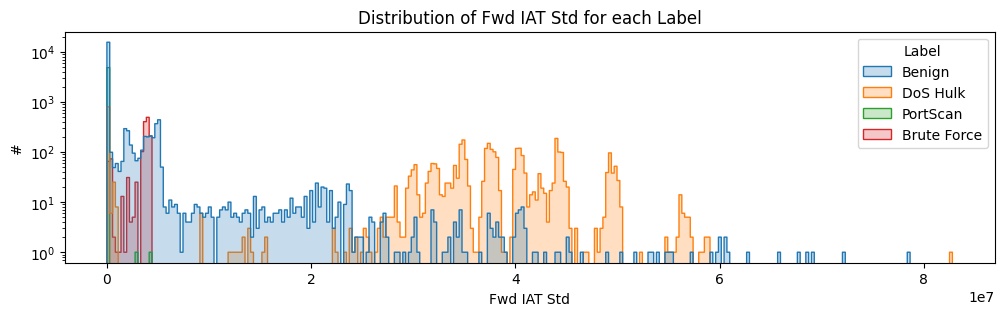

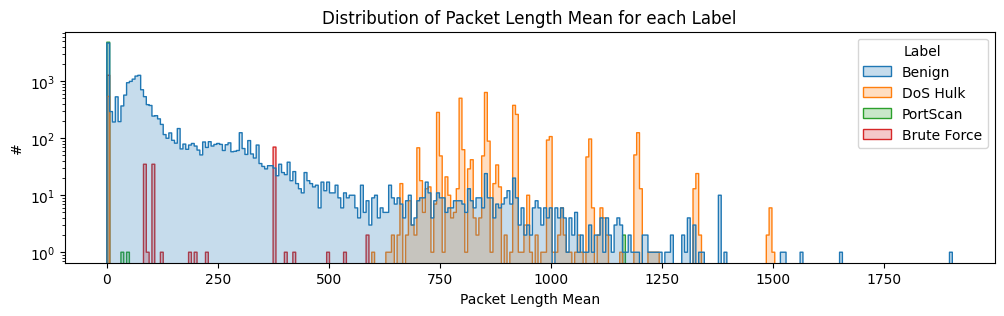

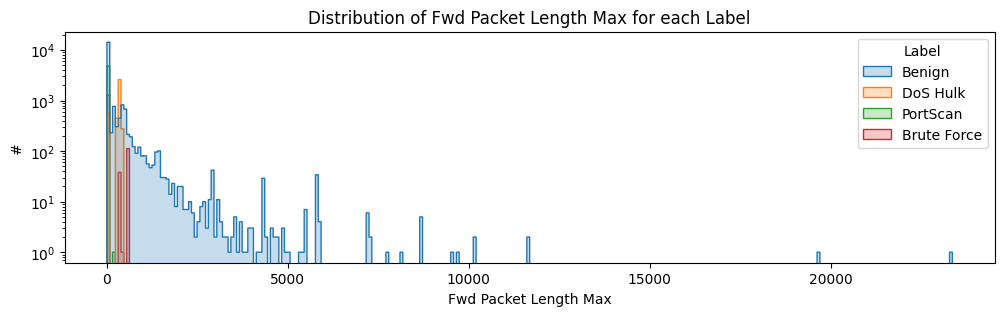

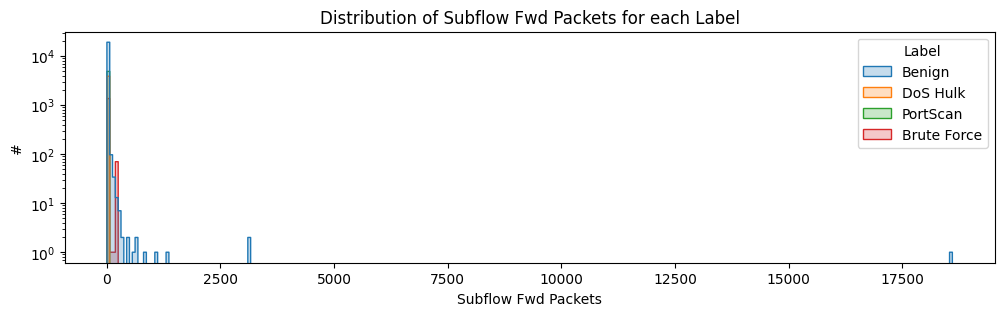

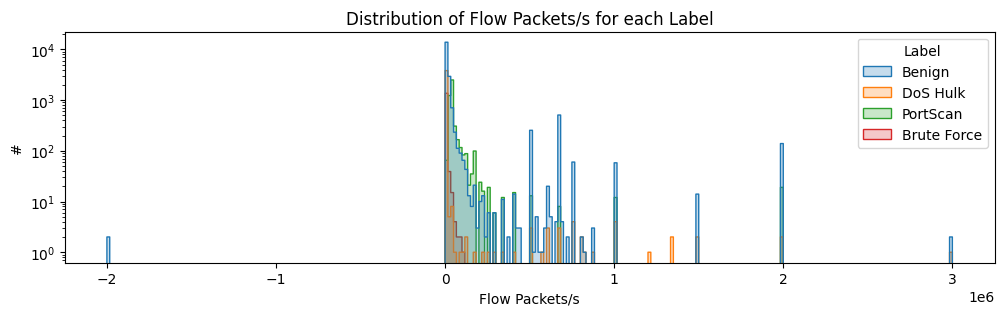

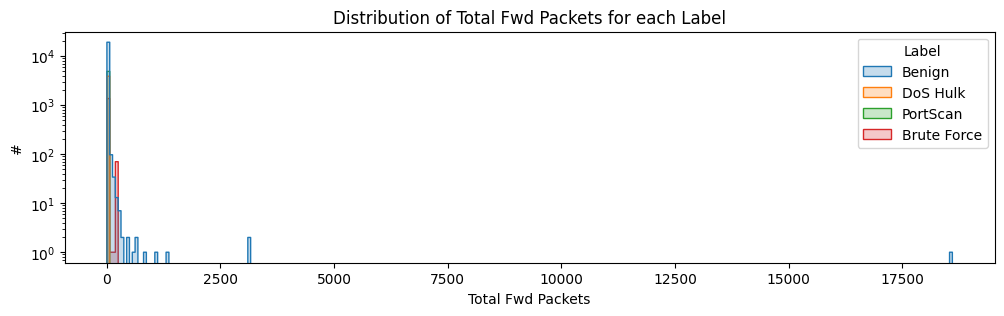

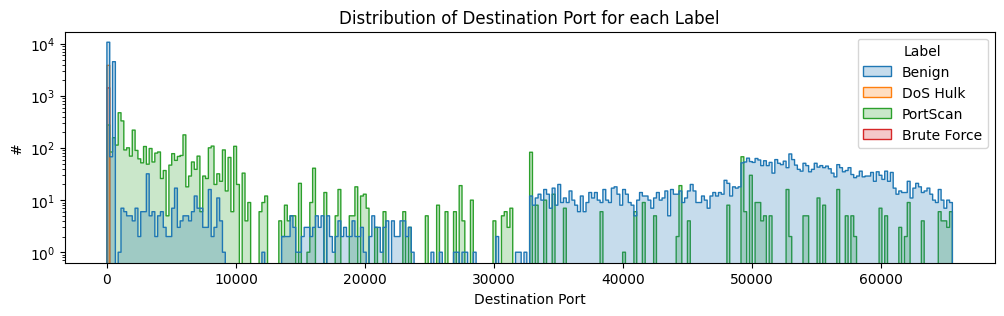

In [5]:
label_column = df.columns[-1]  # Get the last column (assumed to be categorical labels)

# Ensure the label column is categorical for proper hue handling
df[label_column] = df[label_column].astype(str)  # Convert to string to prevent issues

for column in df.columns[:-1]:  # Iterate over all columns except the last one
    plt.figure(figsize=(12, 3))
    ax = sns.histplot(
        data=df,
        x=column,
        hue=label_column,  # Dynamically set the hue based on last column
        element="step",
        common_norm=False,
        multiple="layer",
        bins=300,
        legend=True
    )

    # Manually fetch the legend handles and labels
    handles, labels = ax.get_legend_handles_labels()

    if labels:  # Only add legend if labels exist
        plt.legend(handles=handles, labels=labels, title=label_column)

    plt.yscale("log")
    plt.title(f'Distribution of {column} for each {label_column}')
    plt.xlabel(column)
    plt.ylabel('#')
    plt.show()

We see when features `Fwd PSH Flags` and `SYN Flag Count` are `1`, the row is always labeled as Bening, these are not features that are usefull to classify attacks and for this reason they are dropped.

In [6]:
df.drop('SYN Flag Count', axis=1, inplace=True)
df.drop('Fwd PSH Flags', axis=1, inplace=True)

In [7]:
# Encode labels
label_encoder = LabelEncoder()
labels = df['Label']
df['Label'] = label_encoder.fit_transform(labels)

label_mapping = {class_label: index for index, class_label in enumerate(label_encoder.classes_)}
print(label_mapping)


{'Benign': 0, 'Brute Force': 1, 'DoS Hulk': 2, 'PortScan': 3}


### Dataset Splitting

   - **Training Set** → 60%
   - **Validation Set** → 20%
   - **Test Set** → 20%

In [8]:
X = df[df.columns[:-1]].values
y = df['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (17631, 14)
Validation set: (5877, 14)
Test set: (5878, 14)


### Standardization

#### How do you preprocess the data? Is the preprocessing the same as for the training partition?

When preprocessing the test partition of a dataset, the steps should generally align with the preprocessing applied to the training partition to ensure consistency. However, the test partition should not influence the preprocessing parameters determined during the training stage (e.g., mean, standard deviation, or min/max values). For this reason we `.fit_transform()` only on the `X_Train` set and apply the scaler with `transfomr()` on `X_val` and `X_test`



### Standardization
We standardize the dataset to avoid that some features dominate on the others. Standardizing the features ensures that all input variables have a mean of 0 and a standard deviation of 1, which improves model convergence and prevents certain features from dominating due to scale differences.

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Task 2: Shallow Neural Network

| **Hyperparameter**         | **Value**                                      |
|----------------------------|-----------------------------------------------|
| Layers                     | 1                                             |
| Neurons per Layer          | {32, 64, 128}                                 |
| Activation                 | Linear                                        |
| Weight Initialization      | Default                                       |
| Batch Size                 | 64                                            |
| Loss Function              | Cross-Entropy                                 |
| Optimizer                  | AdamW                                         |
| Learning Rate              | 0.0005                                        |
| Epochs & Early Stopping    | 100 or shorter based on the designed criteria |
| Regularization             | None                                          |

Answer the following questions.

- Describe how you carried out the training process.
- How does the loss curve evolve during training on the training and validation set?
- How do you select the best model across epochs? Which model do you use for validation
and test?
- What is the overall classification performance in the validation and test datasets and
considering the different classes? Indicate the results.
- Why is the performance of the model so poor?

Change the model with the best performance (optimal number of neurons) by changing the
activation function in ReLU and evaluate the effects.

In [10]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [11]:
class SingleLayerNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayerNN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  # Single layer with 64 neurons

    def forward(self, x):
        return self.linear(x)  # Linear activation (default)

In [12]:
model = SingleLayerNN(input_size=14, output_size=4)

In [13]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)


In [15]:
# Prepare data loaders for mini-batch training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [16]:
# Training loop with early stopping
def training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion):
    num_epochs = 100
    patience = 10  # Early stopping patience
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    start_time = time.time()

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                epoch_val_loss += loss.item()

        val_losses.append(epoch_val_loss / len(val_loader))

        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state_dict = model.state_dict()  # Save best model state
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")

    # Load the best model state before returning
    model.load_state_dict(best_model_state_dict)

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    # plt.yscale('log')
    plt.legend()
    plt.show()
    return model, train_losses, val_losses # Return the trained model and losses



In [17]:
def testing_model(model, dataloader, device):
    """
    Evaluate the model on a given dataloader and compute accuracy.

    Args:
        model: The trained model.
        dataloader: DataLoader for the dataset.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()

    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move batch to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest score
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    return accuracy, all_labels, all_predictions

Epoch 10/100, Train Loss: 0.5572, Val Loss: 0.5341
Epoch 20/100, Train Loss: 0.4642, Val Loss: 0.4434
Epoch 30/100, Train Loss: 0.4276, Val Loss: 0.4060
Epoch 40/100, Train Loss: 0.4079, Val Loss: 0.3854
Epoch 50/100, Train Loss: 0.3948, Val Loss: 0.3725
Epoch 60/100, Train Loss: 0.3860, Val Loss: 0.3633
Epoch 70/100, Train Loss: 0.3794, Val Loss: 0.3565
Epoch 80/100, Train Loss: 0.3746, Val Loss: 0.3512
Epoch 90/100, Train Loss: 0.3708, Val Loss: 0.3471
Epoch 100/100, Train Loss: 0.3667, Val Loss: 0.3436
Training completed in 45.03 seconds.


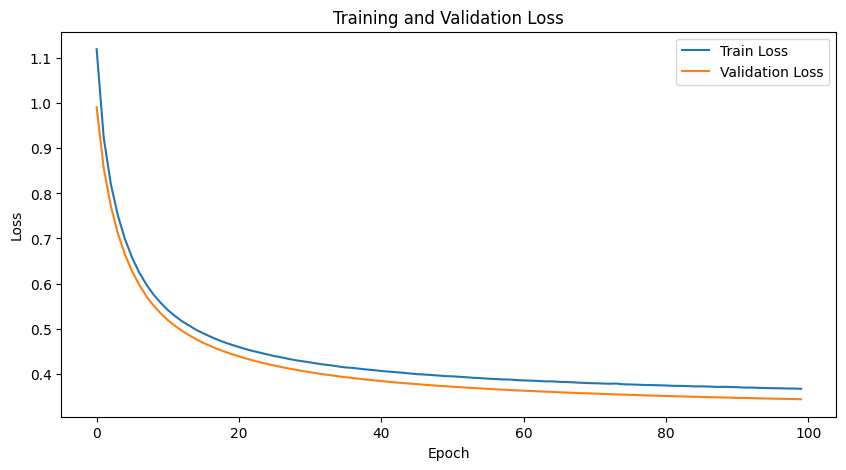

In [18]:
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion)

In [19]:
# 2. Then evaluate the trained model
train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

# 3. Finally print the results
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Train report")
print(classification_report(train_labels, train_preds))
print("Val report")
print(classification_report(val_labels, val_preds))
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.2108 seconds to execute.
The function took 0.0687 seconds to execute.
The function took 0.0697 seconds to execute.
Train Accuracy: 87.8112
Validation Accuracy: 88.2083
Test Accuracy: 88.6866
Train report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11515
           1       0.00      0.00      0.00       866
           2       0.97      0.84      0.90      2292
           3       0.81      0.88      0.85      2958

    accuracy                           0.88     17631
   macro avg       0.67      0.67      0.67     17631
weighted avg       0.84      0.88      0.86     17631

Val report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3900
           1       0.00      0.00      0.00       286
           2       0.98      0.86      0.92       776
           3       0.81      0.88      0.84       915

    accuracy                           0.88      5877
   m

#### Describe how you carried out the training process.

The model was trained using a single-layer neural network (SingleLayerNN) implemented in PyTorch. The data was loaded into mini-batches of size 64 using DataLoader. The loss function used was cross-entropy, and the optimizer was AdamW with a learning rate of 0.0005. Early stopping was implemented with a patience of 10 epochs, and the model with the lowest validation loss was saved and restored.

#### How does the loss curve evolve during training on the training and validation set?

During training, both the training and validation loss generally decreased over epochs, but the improvement plateaued after a certain point. The model stopped training early based on the early stopping criterion to avoid overfitting. A plot of training and validation loss was shown to visualize the evolution of losses across epochs.

#### How do you select the best model across epochs? Which model do you use for validation and test?

The best model was selected using early stopping, by monitoring the validation loss after each epoch. The model state (weights) corresponding to the lowest validation loss was saved. This best-performing model was then used for both validation and test evaluations.

#### What is the overall classification performance in the validation and test datasets and considering the different classes? Indicate the results.

See the Train Accuracy, Validation Accuracy and Test Accuracy above.For per-class performance we added precision, recall, f1-score and support report

#### Why is the performance of the model so poor?

The poor performance can be attributed to:

- The use of linear activation, which limits the model's capacity to learn nonlinear patterns in the data.
- A very simple architecture (only one layer, no regularization).
- Possibly imbalanced or complex data that needs more expressive power.


### Best performance model with ReLU Activation Function

In [20]:
class NonLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [21]:
model = NonLinearModel(14, 4)
model = model.to(device)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [23]:
def training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion):
    num_epochs = 100
    patience = 20  # Early stopping patience
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    start_time = time.time()

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                epoch_val_loss += loss.item()

        val_losses.append(epoch_val_loss / len(val_loader))

        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state_dict = model.state_dict()  # Save best model state
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")

    # Load the best model state before returning
    model.load_state_dict(best_model_state_dict)

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    return model, train_losses, val_losses # Return the trained model and losses


Epoch 10/100, Train Loss: 0.1473, Val Loss: 0.1311
Epoch 20/100, Train Loss: 0.1232, Val Loss: 0.1207
Epoch 30/100, Train Loss: 0.1127, Val Loss: 0.1056
Epoch 40/100, Train Loss: 0.1049, Val Loss: 0.0978
Epoch 50/100, Train Loss: 0.1006, Val Loss: 0.0996
Epoch 60/100, Train Loss: 0.0962, Val Loss: 0.0956
Epoch 70/100, Train Loss: 0.0948, Val Loss: 0.0943
Epoch 80/100, Train Loss: 0.0892, Val Loss: 0.0898
Epoch 90/100, Train Loss: 0.0870, Val Loss: 0.0927
Epoch 100/100, Train Loss: 0.0824, Val Loss: 0.0924
Training completed in 73.37 seconds.


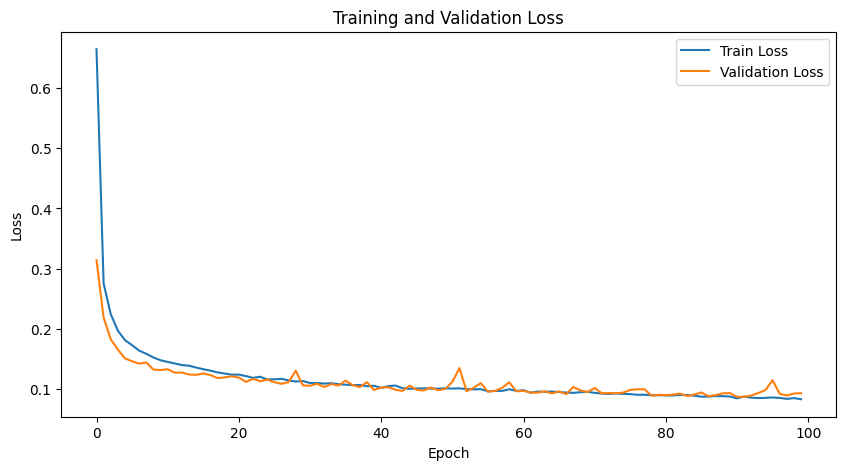

(NonLinearModel(
   (fc1): Linear(in_features=14, out_features=32, bias=True)
   (fc2): Linear(in_features=32, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=128, bias=True)
   (fc4): Linear(in_features=128, out_features=4, bias=True)
 ),
 [0.6650682134904723,
  0.2751535327322241,
  0.22405498339862062,
  0.19663675040330575,
  0.1808399664697008,
  0.17235143560970176,
  0.1632933294724511,
  0.15808861709429303,
  0.15190678168142188,
  0.1472855795957688,
  0.1444908110289902,
  0.1419182518578094,
  0.13928417156220993,
  0.13821097135381855,
  0.1351597037139362,
  0.1324156053782697,
  0.13000189750522806,
  0.12711533248100593,
  0.12510449774023416,
  0.12323604671932432,
  0.12341940096592989,
  0.12093952443261725,
  0.11799604596192206,
  0.11981796280251465,
  0.11524722124517396,
  0.11563894369275025,
  0.11634811950658543,
  0.11375889055889801,
  0.11191281054735831,
  0.11274810670537577,
  0.10939121842249364,
  0.10949155598865364,
  0.108

In [24]:
training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion)

In [25]:
# print(f'Learned weights: {model.fc1.weight.data}')
# print(f'Learned biases: {model.fc1.bias.data}')
# print(f'Learned weights: {model.fc2.weight.data}')
# print(f'Learned biases: {model.fc2.bias.data}')
# print(f'Learned weights: {model.fc3.weight.data}')
# print(f'Learned biases: {model.fc3.bias.data}')
# print(f'Learned weights: {model.fc4.weight.data}')
# print(f'Learned biases: {model.fc4.bias.data}')

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Train report")
print(classification_report(train_labels, train_preds))
print("Val report")
print(classification_report(val_labels, val_preds))
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.2626 seconds to execute.
The function took 0.0783 seconds to execute.
The function took 0.0808 seconds to execute.
Train Accuracy: 96.5062
Validation Accuracy: 96.1205
Test Accuracy: 96.7676
Train report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11515
           1       0.87      0.99      0.93       866
           2       0.94      0.97      0.96      2292
           3       0.99      0.89      0.94      2958

    accuracy                           0.97     17631
   macro avg       0.94      0.96      0.95     17631
weighted avg       0.97      0.97      0.96     17631

Val report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3900
           1       0.88      0.98      0.93       286
           2       0.92      0.96      0.94       776
           3       0.98      0.89      0.93       915

    accuracy                           0.96      5877
   m

## Task3: The impact of specific features

As you learned in the lecture, biases in data collection can carry over to the model and become inductive biases.  
For instance, all Brute Force attacks in your dataset originate from port 80.  

- Is this a reasonable assumption?  
-  Now replace port 80 with port 8080 for the Brute Force attacks in the test set. Use the previously trained model for inference:  
    - Does the performance change?
    - How does it change?
    - Why?

Now remove the feature **port** from the original dataset (**use this dataset from now on for the entire lab**) and repeat all preprocessing steps.  

- How many PortScan instances do you now have after preprocessing?
- How many did you have before?
- Why do you think PortScan is the most affected class after dropping duplicates?
- Are the classes now balanced?

Now repeat the training process with the best architecture found in the previous step:  
- How does the performance change?
- Can you still classify the rarest class?

To improve performance and account for class imbalance, use a *weighted loss function*. Use the `weight` parameter of `CrossEntropyLoss`, which expects a tensor of class weights. To estimate the weights, use the `compute_class_weight` function from `sklearn` and set `class_weight="balanced"`. Repeat the training process with the new loss function.  

- How does the performance change per class and overall?
- How does the accuracy change?
- How does the F1-score change?  

## Bias analysis
All Brute Force attacks form port 80 is not a reasonable assumption. In real work they can target any port, depending on the exposed service. Assuming they only come from port 80 is a form of bias: it makes the model associate "port 80" directly with "Brute Force", rather than learning the true patterns of attack behavior. This bias may cause the model to fail to generalize to attacks using other ports.

In [26]:
# Creation of a fake sample to obtain the standardization of port 8080
sample = np.zeros((1, X_train.shape[1]))
sample[0, 13] = 8080
standardized_8080 = scaler.transform(sample)[0, 13]

In [27]:
X_test_modified = X_test.copy()

brute_force_indices = y_test == label_mapping['Brute Force']
port_col_index = df.columns.get_loc('Destination Port')

X_test_modified[brute_force_indices, port_col_index] = standardized_8080

### Evaluation on test set with Brute Force on port 8080


In [28]:
X_test_mod_tensor = torch.tensor(X_test_modified, dtype=torch.float32).to(device)
test_mod_dataset = TensorDataset(X_test_mod_tensor, y_test_tensor)
test_mod_loader = DataLoader(test_mod_dataset, batch_size=batch_size, shuffle=False)

test_accuracy, test_labels, test_preds = testing_model(model, test_mod_loader, device)


print(f'Test Accuracy: {test_accuracy:.4f}')
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.0893 seconds to execute.
Test Accuracy: 92.3273
Test report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3827
           1       0.27      0.05      0.08       275
           2       0.93      0.98      0.96       800
           3       0.98      0.90      0.94       976

    accuracy                           0.92      5878
   macro avg       0.78      0.73      0.73      5878
weighted avg       0.90      0.92      0.91      5878



#### Label 1 (Brute Force) Analysis:
- Precision = 0 → it don’t even predict Brute Force for anything.
- Recall = 0.05 → the model don’t correctly classify any Brute Force samples.
- F1-score = 0.09 → no balance between precision/recall because both are zero.

This means the model can't classify correctly the Brute Force's datapoint.

## Preprocessing w/o 'Destination Port' feature

In [29]:
df2 = pd.read_csv(dataset_url)
df2.drop(['SYN Flag Count','Fwd PSH Flags','Destination Port'], axis=1, inplace=True)
df2.drop_duplicates(inplace=True)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)
df2

,Flow Duration,Flow IAT Mean,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Label
0,303376,3.033760e+04,749.4,1448,12743.263,0,19.833334,98776.15,322.16666,119,6,36.258636,6,Benign
1,117,1.170000e+02,0.0,0,0.000,1,0.000000,0.00,0.00000,0,1,17094.018000,1,Benign
2,142,1.420000e+02,0.0,0,84507.040,0,6.000000,0.00,6.00000,6,2,14084.507000,2,Benign
3,191,6.366667e+01,52.0,52,921465.940,1,36.000000,0.00,42.40000,36,2,20942.408000,2,Benign
4,4,4.000000e+00,0.0,0,3000000.000,0,6.000000,0.00,6.00000,6,2,500000.000000,2,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0.0,0,0.000,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,Brute Force
31503,5862561,1.954187e+06,0.0,0,0.000,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,Brute Force
31504,5854872,1.951624e+06,0.0,0,0.000,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,Brute Force
31505,5555547,1.851849e+06,0.0,0,0.000,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,Brute Force


### PortScan instances

In [30]:
cardinality_portscan_df = labels.value_counts().get('PortScan', 0)
cardinality_portscan_df2 = df2['Label'].value_counts().get('PortScan', 0)

print("PortScan datapoint before bias analysis: # " + str(cardinality_portscan_df))
print("PortScan datapoint after bias analysis: # " + str(cardinality_portscan_df2))

PortScan datapoint before bias analysis: # 4849
PortScan datapoint after bias analysis: # 285


A lot of `PortScan` datapoints are being dropped because the only differing feature is the Destination Port

### Class balance
The dataset remains imbalanced also after bias analysis, with the `Benign` class still significantly outweighing the `PortScan` class, which has been drastically reduced.

In [31]:
class_balance_old = labels.value_counts()
print("Class balance before Bias Analysis")
print(class_balance_old)

print("Class balance after Bias Analysis")
class_balance = df2['Label'].value_counts()
print(class_balance)

Class balance before Bias Analysis
Label
Benign         19242
PortScan        4849
DoS Hulk        3868
Brute Force     1427
Name: count, dtype: int64
Class balance after Bias Analysis
Label
Benign         16889
DoS Hulk        3868
Brute Force     1427
PortScan         285
Name: count, dtype: int64


### New training with the latest architecture found in the previous step


In [32]:
df2 = df2.reset_index(drop=True)
X = df2[df2.columns[:-1]].values

labels2 = df2['Label']
df2['Label'] = label_encoder.transform(labels2)
y = df2['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

Training set: (13481, 13)
Validation set: (4494, 13)
Test set: (4494, 13)


In [33]:
# Prepare data loaders for mini-batch training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch 10/100, Train Loss: 0.1373, Val Loss: 0.1441
Epoch 20/100, Train Loss: 0.1205, Val Loss: 0.1199
Epoch 30/100, Train Loss: 0.1113, Val Loss: 0.1112
Epoch 40/100, Train Loss: 0.1039, Val Loss: 0.1014
Epoch 50/100, Train Loss: 0.0964, Val Loss: 0.0988
Epoch 60/100, Train Loss: 0.0946, Val Loss: 0.1039
Epoch 70/100, Train Loss: 0.0925, Val Loss: 0.1022
Epoch 80/100, Train Loss: 0.0907, Val Loss: 0.1018
Epoch 90/100, Train Loss: 0.0872, Val Loss: 0.1002
Early stopping triggered.
Training completed in 53.81 seconds.


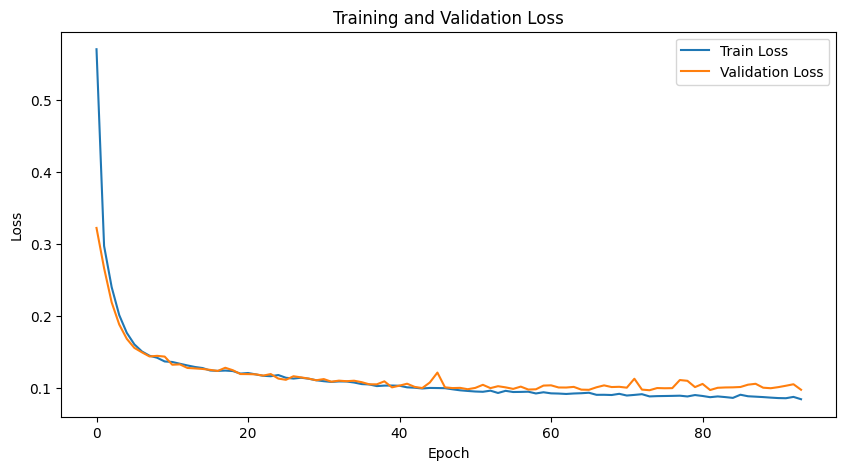

(NonLinearModel(
   (fc1): Linear(in_features=13, out_features=32, bias=True)
   (fc2): Linear(in_features=32, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=128, bias=True)
   (fc4): Linear(in_features=128, out_features=4, bias=True)
 ),
 [0.5703758162344802,
  0.29756379364084856,
  0.24045963534176068,
  0.201643022880735,
  0.1769793674491028,
  0.1610032767763635,
  0.1511653578217843,
  0.14526414189717216,
  0.14248184908305017,
  0.1373364835606791,
  0.13663419023579895,
  0.13416828927517785,
  0.13180832876448664,
  0.1296814836967754,
  0.12820037280460952,
  0.12479722113194058,
  0.12425602859954275,
  0.12470071523569488,
  0.12400765107918124,
  0.12049719937569439,
  0.1213225298494948,
  0.11941540503424208,
  0.11745673619316653,
  0.11686023495985433,
  0.11849259612508012,
  0.11472575587189593,
  0.1136019503282851,
  0.11474393733657932,
  0.11342958325599607,
  0.11126136246591947,
  0.10994603315377123,
  0.10892932162006602,
  0.1096

In [34]:
model = NonLinearModel(13, 4)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion)

In [35]:
train_accuracy_noport, train_labels_noport, train_preds_noport = testing_model(model, train_loader, device)
val_accuracy_noport, val_labels_noport, val_preds_noport = testing_model(model, val_loader, device)
test_accuracy_noport, test_labels_noport, test_preds_noport = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy_noport:.4f}')
print(f'Validation Accuracy: {val_accuracy_noport:.4f}')
print(f'Test Accuracy: {test_accuracy_noport:.4f}')

print("Train report")
print(classification_report(train_labels_noport, train_preds_noport))
print("Val report")
print(classification_report(val_labels_noport, val_preds_noport))
print("Test report")
print(classification_report(test_labels_noport, test_preds_noport))

The function took 0.1890 seconds to execute.
The function took 0.0717 seconds to execute.
The function took 0.0632 seconds to execute.
Train Accuracy: 96.3356
Validation Accuracy: 96.2839
Test Accuracy: 96.4842
Train report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     10133
           1       0.94      0.95      0.94       855
           2       0.94      0.94      0.94      2318
           3       0.54      0.75      0.63       175

    accuracy                           0.96     13481
   macro avg       0.85      0.90      0.87     13481
weighted avg       0.97      0.96      0.96     13481

Val report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3377
           1       0.94      0.92      0.93       273
           2       0.93      0.94      0.94       786
           3       0.56      0.76      0.65        58

    accuracy                           0.96      4494
   m

While the overall accuracy metrics of the model still look good, the performance for the rare class PortScan has significantly decreased in the new model. The model is struggling to identify this rare class effectively, especially when compared to the previous model.
- Recall and F1-scores for PortScan have dropped, meaning the model is missing many instances of this rare class.
- The model can classify PortScan with significantly reduced performance.

### Weighted loss function

Epoch 10/100, Train Loss: 0.2234, Val Loss: 0.2481
Epoch 20/100, Train Loss: 0.1968, Val Loss: 0.2358
Epoch 30/100, Train Loss: 0.1897, Val Loss: 0.2438
Epoch 40/100, Train Loss: 0.1734, Val Loss: 0.2296
Early stopping triggered.
Training completed in 28.17 seconds.


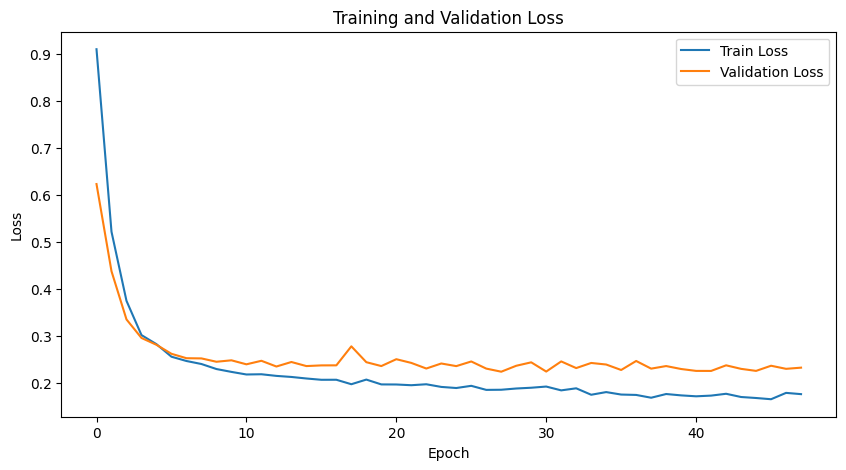

(NonLinearModel(
   (fc1): Linear(in_features=13, out_features=32, bias=True)
   (fc2): Linear(in_features=32, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=128, bias=True)
   (fc4): Linear(in_features=128, out_features=4, bias=True)
 ),
 [0.9100821008331967,
  0.5217276752983789,
  0.3746577273189174,
  0.3017560014086312,
  0.2823970782177708,
  0.2557357200620016,
  0.24660731506008673,
  0.24019715108718917,
  0.22950785557664402,
  0.22342191251674534,
  0.2179139534373419,
  0.21839436219554942,
  0.21490735428240063,
  0.21265358098239695,
  0.20938230378297268,
  0.20662273418034705,
  0.206698377691739,
  0.19718390115276332,
  0.20705236514844882,
  0.19678153293604533,
  0.19661289106577776,
  0.19506311069697282,
  0.19710405260960073,
  0.1914421738924291,
  0.1891085051035429,
  0.19376869600319185,
  0.1851388643632568,
  0.18542337403478215,
  0.18807699570158645,
  0.18970676302309566,
  0.1922101935115753,
  0.1841052006841836,
  0.18848972

In [36]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

model = NonLinearModel(13, 4)
model = model.to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion)

In [37]:
train_accuracy_noport_weights, train_labels_noport_weights, train_preds_noport_weights = testing_model(model, train_loader, device)
val_accuracy_noport_weights, val_labels_noport_weights, val_preds_noport_weights = testing_model(model, val_loader, device)
test_accuracy_noport_weights, test_labels_noport_weights, test_preds_noport_weights = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy_noport_weights:.4f}')
print(f'Validation Accuracy: {val_accuracy_noport_weights:.4f}')
print(f'Test Accuracy: {test_accuracy_noport_weights:.4f}')

print("Train report")
print(classification_report(train_labels_noport_weights, train_preds_noport_weights))
print("Val report")
print(classification_report(val_labels_noport_weights, val_preds_noport_weights))
print("Test report")
print(classification_report(test_labels_noport_weights, test_preds_noport_weights))

The function took 0.1950 seconds to execute.
The function took 0.0592 seconds to execute.
The function took 0.0606 seconds to execute.
Train Accuracy: 93.6800
Validation Accuracy: 94.2590
Test Accuracy: 93.4802
Train report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10133
           1       0.79      0.95      0.86       855
           2       0.89      0.95      0.92      2318
           3       0.38      0.87      0.53       175

    accuracy                           0.94     13481
   macro avg       0.76      0.93      0.82     13481
weighted avg       0.95      0.94      0.94     13481

Val report
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3377
           1       0.79      0.93      0.86       273
           2       0.90      0.96      0.93       786
           3       0.44      0.91      0.60        58

    accuracy                           0.94      4494
   m

The drastic drop in precision for class 3 when we introduce class weights is likely due to the model becoming too focused on this class during training, which leads to an increase in false positives.
Precision Definition:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$


So, when the model starts predicting class 3 more often (due to the increased weight), the False Positives for class 3 increase, which leads to a drop in precision.

**Performance per Class**: The performance across different classes changes when class weights are introduced. For some classes, such as class 3, precision decreases significantly, which means the model is now classifying many instances as class 3 incorrectly (false positives). For other classes, like class 0, while the recall remains high, the precision drops slightly, indicating the model is misclassifying some instances of other classes as class 0. The F1-score for class 3 decreases as well, showing a negative impact on both precision and recall. Overall, the rare class (class 3) gets more attention but with less precision, and the balance of performance between classes is affected.

**Accuracy**: Accuracy decreases significantly when class weights are applied. The model’s overall accuracy drops from approximately 97% to 90%. This indicates that while the model improves its ability to predict the rare class (class 3) by focusing on it more, this comes at the cost of performance on other classes, leading to a decrease in overall correct predictions.

**F1-score**: The F1-score, which balances precision and recall, also decreases across the board when class weights are applied. The F1-score for the rare class (class 3) drops significantly, mainly due to the large increase in false positives. While recall for class 3 increases, precision for class 3 suffers, causing the F1-score to decrease. The overall F1-score drops as well, indicating that the model's balance between precision and recall has been disrupted, and it is performing less effectively overall.

In short, while the class weights help improve recall for the minority class, they also lead to a higher number of false positives, hurting precision and the overall F1-score, as well as reducing the model's overall accuracy.

## Task 4: Deep Neural Network

| **Hyperparameter**         | **Value**                      |
|----------------------------|--------------------------------|
| Layers                     | 6                              |
| Neurons per Layer          | {256, 128, 64, 32, 16}        |
| Activation                 | ReLU                           |
| Weight Initialization      | Default                        |
| Batch Size                 | 128                            |
| Loss Function              | Cross-Entropy                  |
| Optimizer                  | AdamW                          |
| Learning Rate              | 0.0005                         |
| Epochs & Early Stopping    | 50                             |
| Regularization             | None                           |

NOTICE: Each # Neurons per Layer describes ow many neurons must be present in each
layer. For example: 1st layer 256, 2nd layer 128 etc.
- What do the losses look like? Is the model overfitting?
Now apply normalization techniques (dropout, batch normalization) and play with the
regularization of the weights (AdamW’s weight decay).
- What impact do the different normalization techniques have on validation and testing
performance?

13
4
Epoch 10/50, Train Loss: 457.8754, Val Loss: 1226.7029
Epoch 20/50, Train Loss: 544.7763, Val Loss: 518.5807
Epoch 30/50, Train Loss: 222.2060, Val Loss: 91.4450
Epoch 40/50, Train Loss: 208.2556, Val Loss: 433.4684
Epoch 50/50, Train Loss: 103.5974, Val Loss: 193.9564
Early stopping triggered.
Training completed in 24.41 seconds.


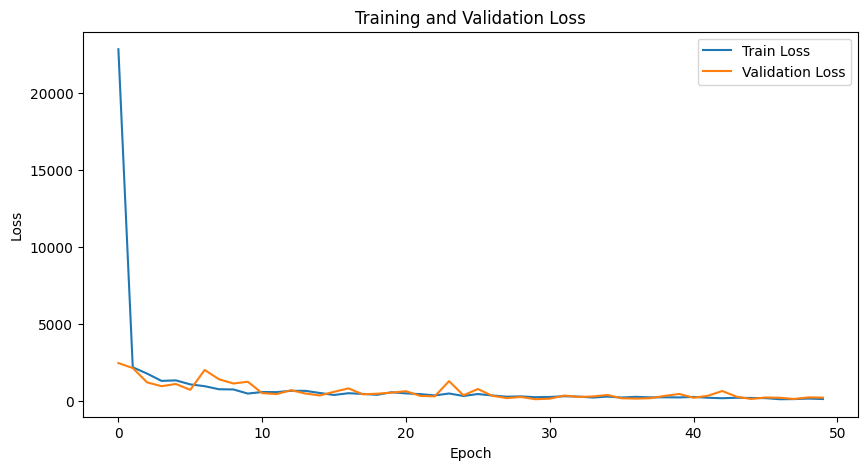

The function took 0.1931 seconds to execute.
The function took 0.0394 seconds to execute.
The function took 0.0425 seconds to execute.
Train Accuracy: 84.3909
Validation Accuracy: 84.3027
Test Accuracy: 84.9006
Epoch 10/50, Train Loss: 1039.2818, Val Loss: 849.3209
Epoch 20/50, Train Loss: 906.5337, Val Loss: 1328.9432
Epoch 30/50, Train Loss: 575.3225, Val Loss: 336.6208
Epoch 40/50, Train Loss: 626.5790, Val Loss: 488.9246
Epoch 50/50, Train Loss: 393.5430, Val Loss: 485.9536
Training completed in 25.23 seconds.


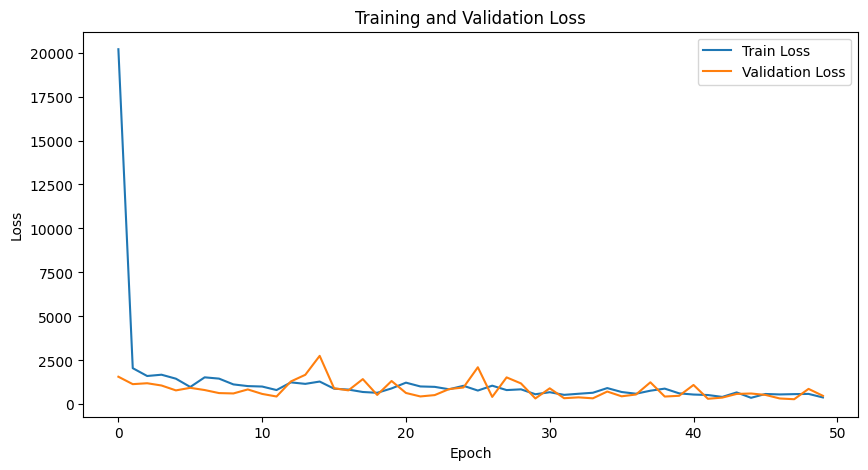

The function took 0.2538 seconds to execute.
The function took 0.0407 seconds to execute.
The function took 0.0407 seconds to execute.
Train Accuracy: 87.9133
Validation Accuracy: 87.7448
Test Accuracy: 88.1934
Epoch 10/50, Train Loss: 391.5148, Val Loss: 326.8247
Epoch 20/50, Train Loss: 9.6688, Val Loss: 0.6441
Epoch 30/50, Train Loss: 0.7567, Val Loss: 0.7602
Epoch 40/50, Train Loss: 0.7482, Val Loss: 0.7536
Early stopping triggered.
Training completed in 23.03 seconds.


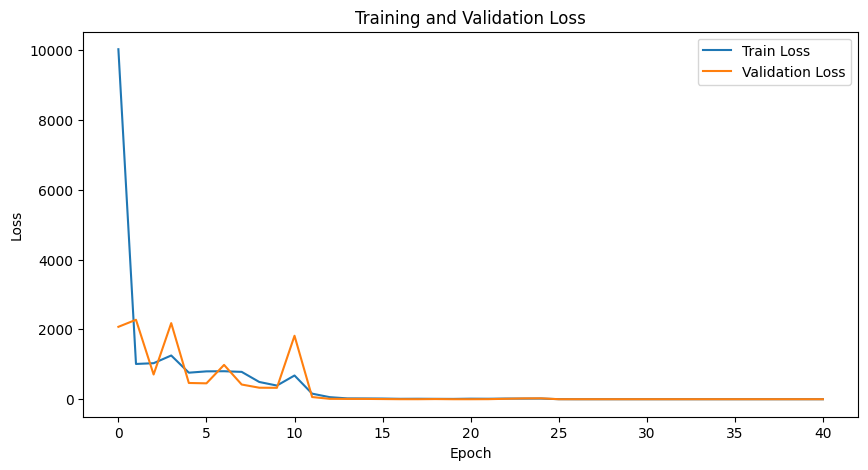

The function took 0.2154 seconds to execute.
The function took 0.0425 seconds to execute.
The function took 0.0413 seconds to execute.
Train Accuracy: 75.2607
Validation Accuracy: 74.7774
Test Accuracy: 75.1112
Epoch 10/50, Train Loss: 0.7880, Val Loss: 0.7871
Epoch 20/50, Train Loss: 0.7223, Val Loss: 0.7309
Epoch 30/50, Train Loss: 0.7012, Val Loss: 0.7089
Epoch 40/50, Train Loss: 0.6885, Val Loss: 0.6938
Epoch 50/50, Train Loss: 0.7484, Val Loss: 0.7536
Training completed in 31.49 seconds.


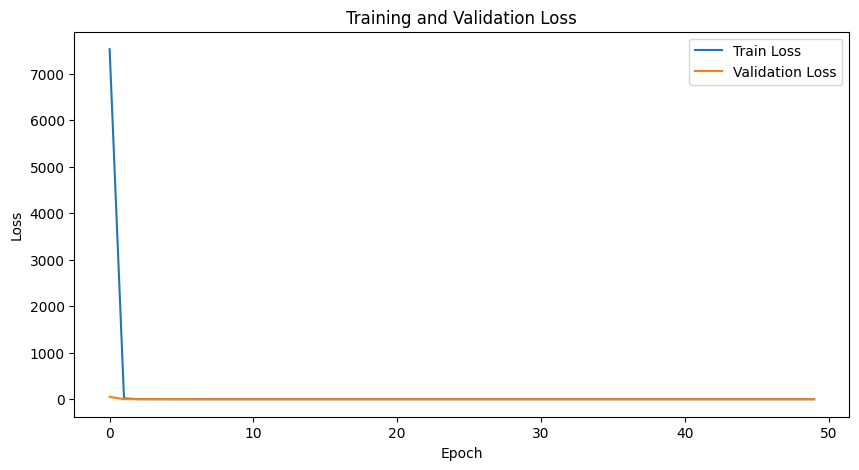

The function took 0.2151 seconds to execute.
The function took 0.0453 seconds to execute.
The function took 0.0419 seconds to execute.
Train Accuracy: 75.2607
Validation Accuracy: 74.7774
Test Accuracy: 75.1112
Epoch 10/50, Train Loss: 0.8372, Val Loss: 0.8328
Epoch 20/50, Train Loss: 0.7526, Val Loss: 0.7577
Epoch 30/50, Train Loss: 0.7441, Val Loss: 0.7502
Epoch 40/50, Train Loss: 0.7423, Val Loss: 0.7486
Epoch 50/50, Train Loss: 0.7412, Val Loss: 0.7477
Training completed in 34.62 seconds.


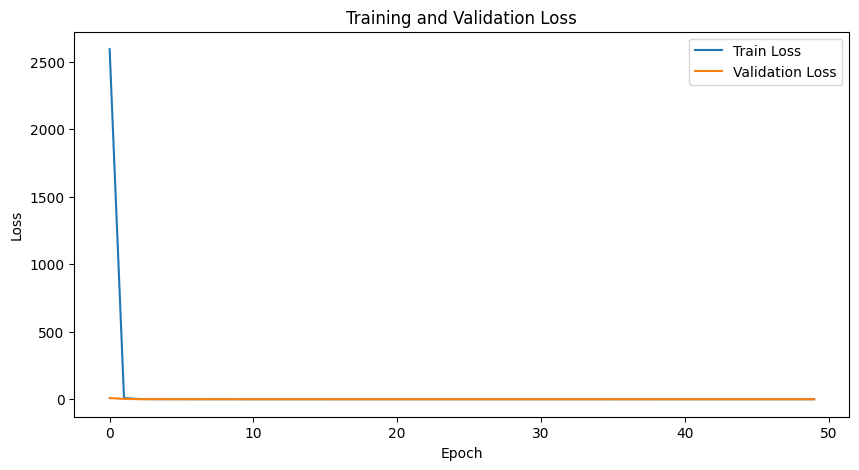

The function took 0.2105 seconds to execute.
The function took 0.0551 seconds to execute.
The function took 0.0448 seconds to execute.
Train Accuracy: 75.5468
Validation Accuracy: 74.9852
Test Accuracy: 75.3782
Best architecture: [32, 16], Test Accuracy: 88.19%


In [60]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

class MulticlassLinearNN(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MulticlassLinearNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

def training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion):
    num_epochs = 50
    patience = 20  # Early stopping patience
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    start_time = time.time()

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                epoch_val_loss += loss.item()

        val_losses.append(epoch_val_loss / len(val_loader))

        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state_dict = model.state_dict()  # Save best model state
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    return model, train_losses, val_losses # Return the trained model and losses

def testing_model(model, dataloader, device):
    """
    Evaluate the model on a given dataloader and compute accuracy.

    Args:
        model: The trained model.
        dataloader: DataLoader for the dataset.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()

    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move batch to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest score
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    return accuracy, all_labels, all_predictions

architectures = [
    [16, 8],             # 2 layers
    [32, 16],            # 2 layers
    [32, 16, 8],         # 3 layers
    [32, 16, 8, 4],      # 4 layers
    [32, 16, 8, 4, 2],   # 5 layers
]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = X_tensor.shape[1]
output_size = len(torch.unique(y_tensor))
print(input_size)
print(output_size)
results = []

best_architecture = None
best_test_acc = 0

# Try each architecture
for hidden_layers in architectures:
    model = MulticlassLinearNN(input_size, hidden_layers, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion
    )
    train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    # Finally print the results
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    if test_accuracy > best_test_acc:
        best_test_acc = test_accuracy
        best_architecture = hidden_layers

print(f"Best architecture: {best_architecture}, Test Accuracy: {best_test_acc:.2f}%")


Training with batch size: 1
Epoch 10/50, Train Loss: 0.7482, Val Loss: 0.7537
Epoch 20/50, Train Loss: 0.7482, Val Loss: 0.7536
Early stopping triggered.
Training completed in 558.64 seconds.


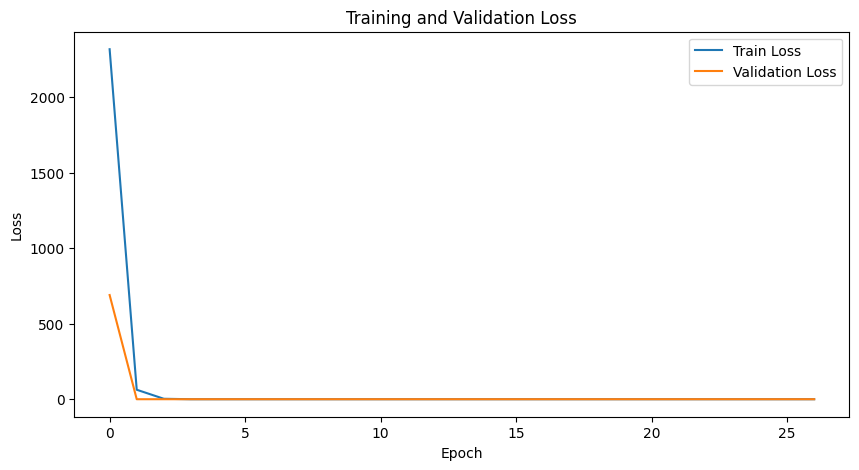

The function took 0.7491 seconds to execute.
The function took 0.7851 seconds to execute.
Validation Accuracy: 74.78%
Test Accuracy: 75.11%
Training Time: 558.79 seconds

Training with batch size: 32
Epoch 10/50, Train Loss: 1585.3192, Val Loss: 3744.3960
Epoch 20/50, Train Loss: 975.9432, Val Loss: 717.2420
Epoch 30/50, Train Loss: 885.1089, Val Loss: 1013.5829
Epoch 40/50, Train Loss: 762.7109, Val Loss: 873.3676
Epoch 50/50, Train Loss: 430.7352, Val Loss: 399.6401
Training completed in 43.26 seconds.


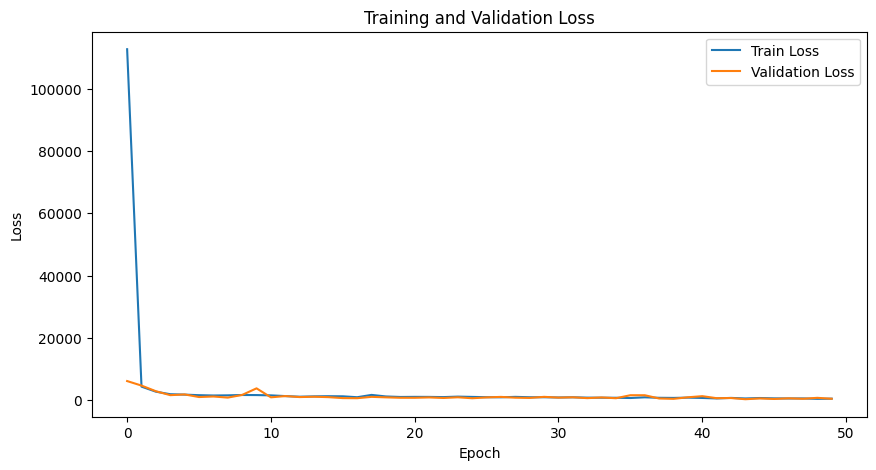

The function took 0.0785 seconds to execute.
The function took 0.0715 seconds to execute.
Validation Accuracy: 87.80%
Test Accuracy: 88.70%
Training Time: 43.41 seconds

Training with batch size: 64
Epoch 10/50, Train Loss: 182.9047, Val Loss: 61.1211
Epoch 20/50, Train Loss: 2.1709, Val Loss: 2.4094
Epoch 30/50, Train Loss: 1.8974, Val Loss: 1.2703
Epoch 40/50, Train Loss: 1.5666, Val Loss: 3.4469
Epoch 50/50, Train Loss: 0.7461, Val Loss: 0.7523
Training completed in 26.07 seconds.


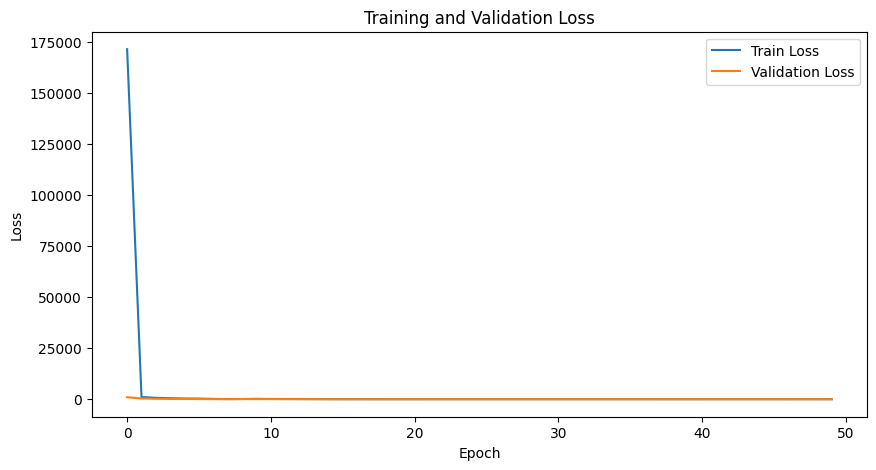

The function took 0.0442 seconds to execute.
The function took 0.0431 seconds to execute.
Validation Accuracy: 74.96%
Test Accuracy: 75.32%
Training Time: 26.22 seconds

Training with batch size: 128
Epoch 10/50, Train Loss: 1.4016, Val Loss: 1.2037
Epoch 20/50, Train Loss: 0.8764, Val Loss: 0.8691
Epoch 30/50, Train Loss: 0.7903, Val Loss: 0.7908
Epoch 40/50, Train Loss: 0.7620, Val Loss: 0.7662
Epoch 50/50, Train Loss: 0.7529, Val Loss: 0.7573
Training completed in 17.00 seconds.


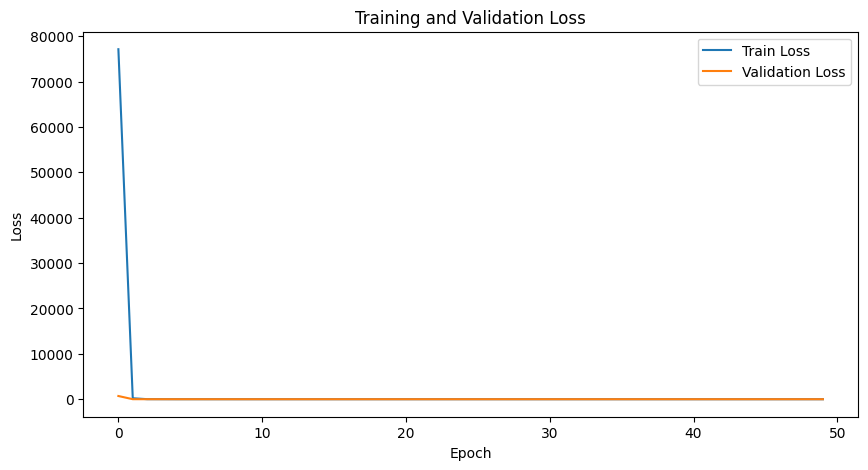

The function took 0.0438 seconds to execute.
The function took 0.0408 seconds to execute.
Validation Accuracy: 74.78%
Test Accuracy: 75.08%
Training Time: 17.17 seconds

Training with batch size: 512
Epoch 10/50, Train Loss: 2524.6580, Val Loss: 1998.0430
Epoch 20/50, Train Loss: 868.4550, Val Loss: 569.4289
Epoch 30/50, Train Loss: 210.1942, Val Loss: 168.7004
Epoch 40/50, Train Loss: 659.8793, Val Loss: 1216.2791
Epoch 50/50, Train Loss: 8.3102, Val Loss: 7.9425
Training completed in 13.26 seconds.


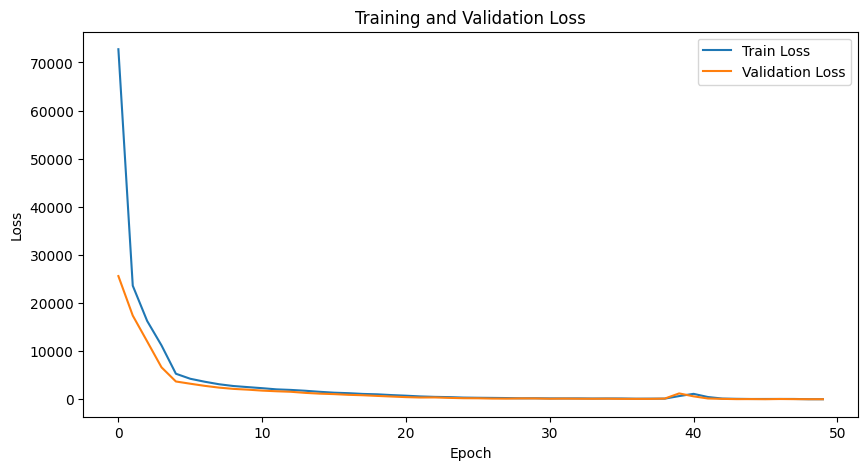

The function took 0.0471 seconds to execute.
The function took 0.0327 seconds to execute.
Validation Accuracy: 71.66%
Test Accuracy: 71.85%
Training Time: 13.42 seconds

--- Summary of Batch Size Impact ---
Batch Size: 1, Validation Accuracy: 74.78%, Test Accuracy: 75.11%, Training Time: 558.79 sec
Batch Size: 32, Validation Accuracy: 87.80%, Test Accuracy: 88.70%, Training Time: 43.41 sec
Batch Size: 64, Validation Accuracy: 74.96%, Test Accuracy: 75.32%, Training Time: 26.22 sec
Batch Size: 128, Validation Accuracy: 74.78%, Test Accuracy: 75.08%, Training Time: 17.17 sec
Batch Size: 512, Validation Accuracy: 71.66%, Test Accuracy: 71.85%, Training Time: 13.42 sec


In [50]:
#4.4.2 (Batch Expirement)
batch_sizes = [1, 32, 64, 128, 512]
batch_results = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")

    # Recreate dataloaders with new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize new model with best architecture
    model = MulticlassLinearNN(input_size, best_architecture, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    # Train the model and measure time
    start_train_time = time.time()
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion
    )
    train_duration = time.time() - start_train_time

    # Evaluate performance
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Training Time: {train_duration:.2f} seconds")

    # Store the results
    batch_results.append({
        'batch_size': batch_size,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_time_sec': train_duration
    })

# Summarize results
print("\n--- Summary of Batch Size Impact ---")
for result in batch_results:
    print(f"Batch Size: {result['batch_size']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%, "
          f"Training Time: {result['train_time_sec']:.2f} sec")


Using Activation Function: Linear
Epoch 10/50, Train Loss: 5091.5276, Val Loss: 4801.0041
Epoch 20/50, Train Loss: 2570.7777, Val Loss: 2615.8700
Epoch 30/50, Train Loss: 1277.0333, Val Loss: 1245.3259
Epoch 40/50, Train Loss: 929.7202, Val Loss: 932.4417
Epoch 50/50, Train Loss: 1692.5173, Val Loss: 2141.3296
Training completed in 14.14 seconds.


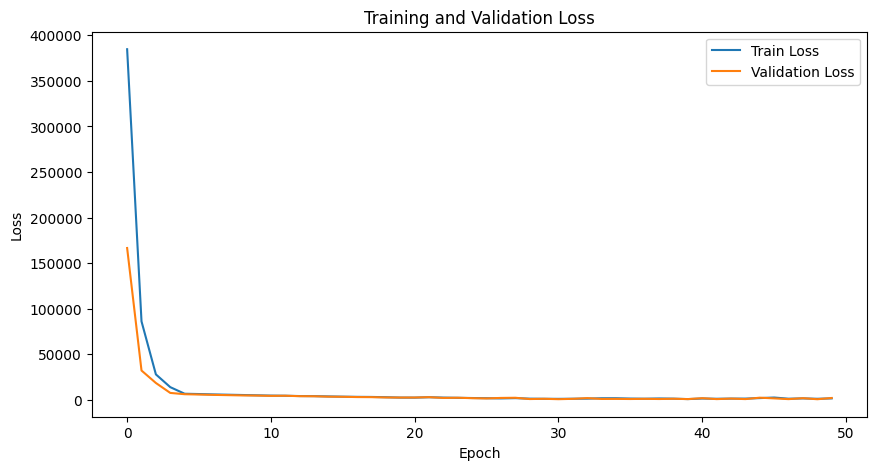

The function took 0.0558 seconds to execute.
The function took 0.0477 seconds to execute.
Validation Accuracy: 78.90%
Test Accuracy: 79.98%

Using Activation Function: Sigmoid
Epoch 10/50, Train Loss: 0.8257, Val Loss: 0.8199
Epoch 20/50, Train Loss: 0.7475, Val Loss: 0.7525
Epoch 30/50, Train Loss: 0.7189, Val Loss: 0.7229
Epoch 40/50, Train Loss: 0.7153, Val Loss: 0.7205
Epoch 50/50, Train Loss: 0.7021, Val Loss: 0.7069
Training completed in 12.39 seconds.


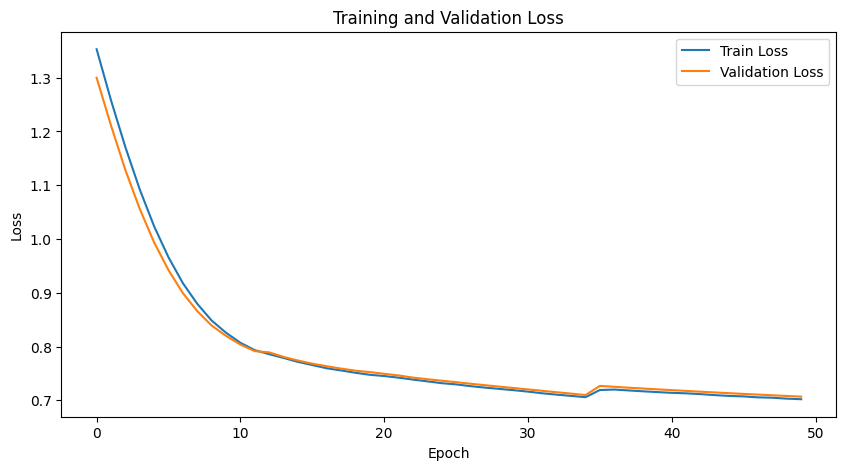

The function took 0.0685 seconds to execute.
The function took 0.0547 seconds to execute.
Validation Accuracy: 74.78%
Test Accuracy: 75.11%

Using Activation Function: ReLU
Epoch 10/50, Train Loss: 1645.8342, Val Loss: 1547.5190
Epoch 20/50, Train Loss: 600.6447, Val Loss: 562.2623
Epoch 30/50, Train Loss: 363.6402, Val Loss: 306.1872
Epoch 40/50, Train Loss: 390.7639, Val Loss: 339.1395
Epoch 50/50, Train Loss: 463.3090, Val Loss: 635.6609
Training completed in 11.94 seconds.


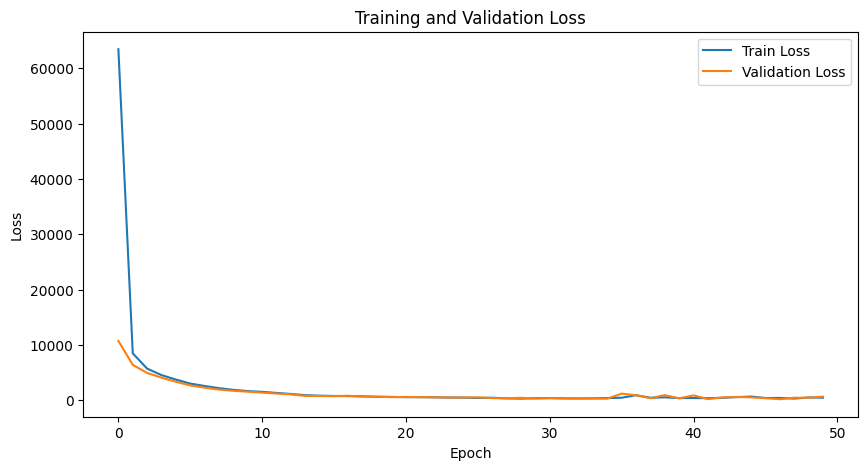

The function took 0.0389 seconds to execute.
The function took 0.0358 seconds to execute.
Validation Accuracy: 84.90%
Test Accuracy: 86.00%

--- Summary of Activation Function Impact ---
Activation: Linear, Validation Accuracy: 78.90%, Test Accuracy: 79.98%
Activation: Sigmoid, Validation Accuracy: 74.78%, Test Accuracy: 75.11%
Activation: ReLU, Validation Accuracy: 84.90%, Test Accuracy: 86.00%


In [55]:
activations = {
    'Linear': nn.Identity(),
    'Sigmoid': nn.Sigmoid(),
    'ReLU': nn.ReLU()
}

activation_results = []
for name, activation_fn in activations.items():
    print(f"\nUsing Activation Function: {name}")

    class ActivationsNN(nn.Module):
        def __init__(self, input_size, hidden_layers, output_size):
            super(ActivationsNN, self).__init__()
            layers = []
            prev_size = input_size
            for hidden_size in hidden_layers:
                layers.append(nn.Linear(prev_size, hidden_size))
                layers.append(activation_fn)  #selected activation
                prev_size = hidden_size
            layers.append(nn.Linear(prev_size, output_size))
            self.model = nn.Sequential(*layers)

        def forward(self, x):
            return self.model(x)

    # Create model
    model = ActivationsNN(input_size, best_architecture, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion
    )

    # Evaluate performance
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Store the results
    activation_results.append({
            'activation': name,
            'val_accuracy': val_accuracy,
            'test_accuracy': test_accuracy
        })

# Summarize results
print("\n--- Summary of Activation Function Impact ---")
for result in activation_results:
    print(f"Activation: {result['activation']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%")


Training with Optimizer: SGD
Epoch 10/50, Train Loss: nan, Val Loss: nan
Epoch 20/50, Train Loss: nan, Val Loss: nan
Early stopping triggered.
Training completed in 12.55 seconds.


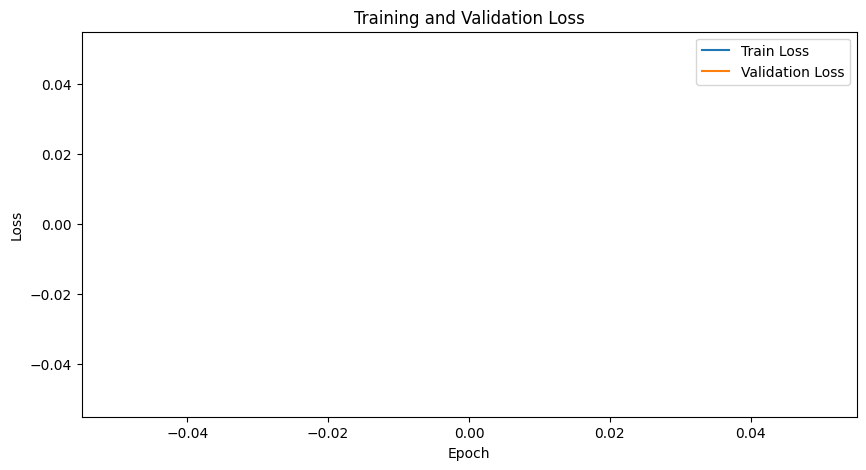

The function took 0.0480 seconds to execute.
The function took 0.0426 seconds to execute.
Validation Accuracy: 74.78%
Test Accuracy: 75.11%
Training Time: 12.69 seconds

Training with Optimizer: SGD+Momentum(0.1)
Epoch 10/50, Train Loss: nan, Val Loss: nan
Epoch 20/50, Train Loss: nan, Val Loss: nan
Early stopping triggered.
Training completed in 7.79 seconds.


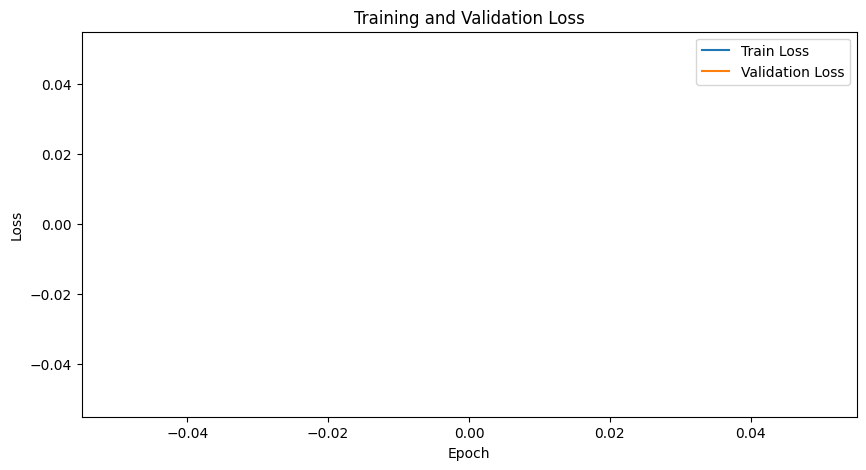

The function took 0.0626 seconds to execute.
The function took 0.0645 seconds to execute.
Validation Accuracy: 74.78%
Test Accuracy: 75.11%
Training Time: 7.98 seconds

Training with Optimizer: SGD+Momentum(0.5)
Epoch 10/50, Train Loss: 0.7500, Val Loss: 0.7554
Epoch 20/50, Train Loss: 0.7482, Val Loss: 0.7535
Epoch 30/50, Train Loss: 0.7478, Val Loss: 0.7533
Epoch 40/50, Train Loss: 0.7477, Val Loss: 0.7532
Epoch 50/50, Train Loss: 0.7477, Val Loss: 0.7533
Training completed in 20.38 seconds.


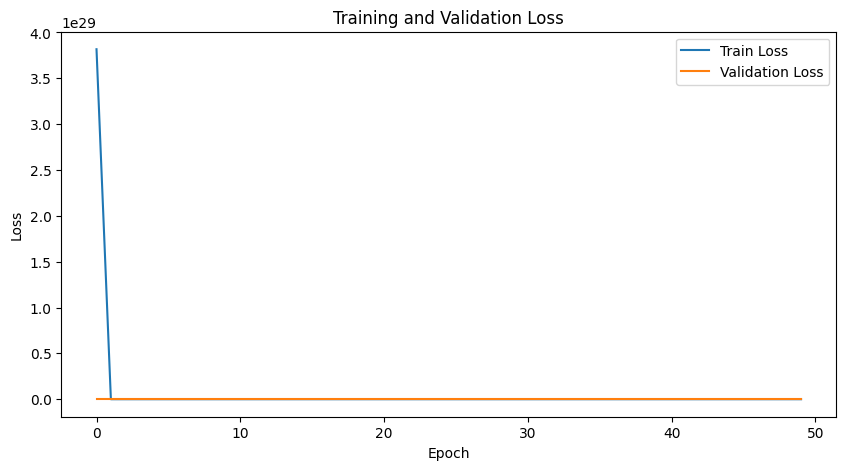

The function took 0.0460 seconds to execute.
The function took 0.0439 seconds to execute.
Validation Accuracy: 74.78%
Test Accuracy: 75.11%
Training Time: 20.53 seconds

Training with Optimizer: SGD+Momentum(0.9)
Epoch 10/50, Train Loss: nan, Val Loss: nan
Epoch 20/50, Train Loss: nan, Val Loss: nan
Early stopping triggered.
Training completed in 8.54 seconds.


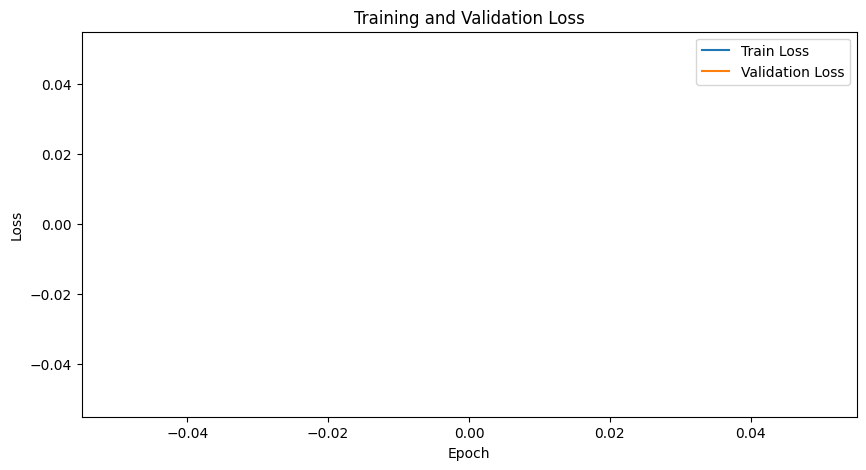

The function took 0.0492 seconds to execute.
The function took 0.0440 seconds to execute.
Validation Accuracy: 74.78%
Test Accuracy: 75.11%
Training Time: 8.68 seconds

Training with Optimizer: AdamW
Epoch 10/50, Train Loss: 1421.2115, Val Loss: 1882.7461
Epoch 20/50, Train Loss: 624.8558, Val Loss: 978.5211
Epoch 30/50, Train Loss: 379.9020, Val Loss: 881.5168
Epoch 40/50, Train Loss: 232.5729, Val Loss: 395.5152
Epoch 50/50, Train Loss: 217.6857, Val Loss: 101.7947
Training completed in 25.97 seconds.


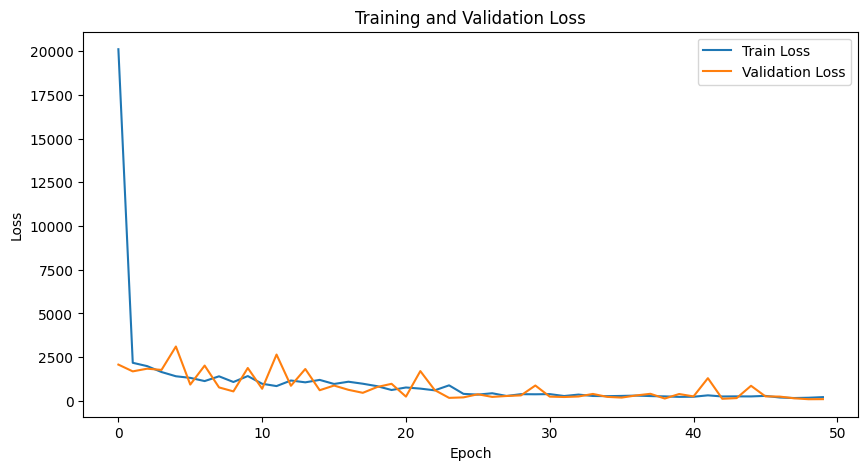

The function took 0.0464 seconds to execute.
The function took 0.0448 seconds to execute.
Validation Accuracy: 91.25%
Test Accuracy: 91.25%
Training Time: 26.12 seconds

--- Summary of Optimizer Function Impact ---
Optimizer: SGD, Validation Accuracy: 74.78%, Test Accuracy: 75.11%
Optimizer: SGD+Momentum(0.1), Validation Accuracy: 74.78%, Test Accuracy: 75.11%
Optimizer: SGD+Momentum(0.5), Validation Accuracy: 74.78%, Test Accuracy: 75.11%
Optimizer: SGD+Momentum(0.9), Validation Accuracy: 74.78%, Test Accuracy: 75.11%
Optimizer: AdamW, Validation Accuracy: 91.25%, Test Accuracy: 91.25%


In [62]:
optim_configs = [
    {'name': 'SGD', 'opt': lambda params: optim.SGD(params, lr=0.01)},
    {'name': 'SGD+Momentum(0.1)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.1)},
    {'name': 'SGD+Momentum(0.5)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.5)},
    {'name': 'SGD+Momentum(0.9)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.9)},
    {'name': 'AdamW', 'opt': lambda params: optim.AdamW(params, lr=0.0005)}
]

optimizer_results = []

for config in optim_configs:
    print(f"\nTraining with Optimizer: {config['name']}")

    model = MulticlassLinearNN(input_size, best_architecture, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = config['opt'](model.parameters())

    start_train_time = time.time()
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion
    )
    train_time = time.time() - start_train_time

    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Training Time: {train_time:.2f} seconds")

    optimizer_results.append({
        'optimizer': config['name'],
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_time_sec': train_time,
        'train_losses': train_losses,
        'val_losses': val_losses
    })
print("\n--- Summary of Optimizer Function Impact ---")
for result in optimizer_results:
    print(f"Optimizer: {result['optimizer']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%")